___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
___

## TÍTULO DO SEU PROJETO 
A influência da mídia na saúde das pessoas

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!


___
## Análise e Resultados

In [259]:
%matplotlib inline
from numpy import zeros_like
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [260]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matheus\Documents\GitHub\CDD


In [261]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2013.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [262]:
dados1 = dados[((dados.V2138==4) | (dados.V2138==5) | (dados.V2138==6) | (dados.V2138==14)) & ((dados.V02322==2) | (dados.V02322==4)) & ((dados.V02273==1) | (dados.V02273==3))] 
dados1.loc[:,["V02322", "V02273", "V2138", 'V4621']]

,V02322,V02273,V2138,V4621
232,2.0,1.0,14.0,1.100000e+03
279,2.0,1.0,4.0,5.900000e+02
365,4.0,3.0,4.0,0.000000e+00
963,4.0,3.0,14.0,1.760000e+02
1319,4.0,3.0,5.0,2.800000e+02
1465,2.0,1.0,4.0,7.430000e+02
1502,4.0,3.0,4.0,2.740000e+02
1509,4.0,3.0,14.0,8.000000e+02
1873,4.0,3.0,4.0,8.000000e+02
1875,4.0,3.0,5.0,2.710000e+02


In [263]:
b = dados1.V4621.describe()
b

count    1.715000e+03
mean     3.965015e+10
std      1.951928e+11
min      0.000000e+00
25%      2.260000e+02
50%      3.940000e+02
75%      6.780000e+02
max      1.000000e+12
Name: V4621, dtype: float64

In [264]:
faixa=[0, 937, 1874, 2811, 3748, 4685, 5622, 7496, 9370]
a = pd.cut(dados1.V4621,faixa,False)
ut2 = (a.value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut2

[0, 937)        89.7
[937, 1874)      9.3
[1874, 2811)     0.6
[2811, 3748)     0.2
[3748, 4685)     0.1
[4685, 5622)     0.1
[5622, 7496)     0.1
[7496, 9370)     0.0
Name: V4621, dtype: float64

In [265]:
dados1 = dados1.rename(columns={"V2138":"Atitude"})
dados1 = dados1.rename(columns={"V02322":"Internet"})
dados1 = dados1.rename(columns={"V02273":"TV"})
dados1 = dados1.rename(columns={"V4621":"Salário"})

In [266]:
dados1.Atitude = dados1.Atitude.astype('category')
dados1.Atitude.cat.categories = (['Deixaram de comprar alimentos supérfluos', 'Comeram menos carnes', 'Comeram menos frutas, verduras e legumes', 'Não fizeram nada'])
dados1.Internet = dados1.Internet.astype('category')
dados1.Internet.cat.categories = (['Sim', 'Não'])
dados1.TV = dados1.TV.astype('category')
dados1.TV.cat.categories = (['Sim', 'Não'])
dados1.Salário = dados1.Salário.astype('float')

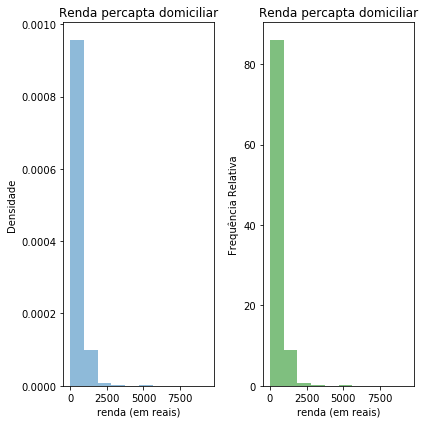

In [267]:
fig = plt.figure(figsize=(11, 5))
plt.subplot(121)
plot = dados1.Salário.plot.hist(bins=faixa,title='Renda percapta domiciliar', figsize=(6, 6), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('renda (em reais)')

plt.subplot(122)
plot = dados1.Salário.plot.hist(bins=faixa, title='Renda percapta domiciliar', weights=zeros_like(dados1.Salário)+1./dados1.Salário.size*100, figsize=(6, 6), color = ('g'), alpha=0.5)
plt.ylabel('Frequência Relativa')
plt.xlabel('renda (em reais)')

plt.tight_layout()
plt.show()

In [268]:
dados1.loc[:,["Internet", "TV", "Atitude", "Salário"]]

,Internet,TV,Atitude,Salário
232,Sim,Sim,Não fizeram nada,1.100000e+03
279,Sim,Sim,Deixaram de comprar alimentos supérfluos,5.900000e+02
365,Não,Não,Deixaram de comprar alimentos supérfluos,0.000000e+00
963,Não,Não,Não fizeram nada,1.760000e+02
1319,Não,Não,Comeram menos carnes,2.800000e+02
1465,Sim,Sim,Deixaram de comprar alimentos supérfluos,7.430000e+02
1502,Não,Não,Deixaram de comprar alimentos supérfluos,2.740000e+02
1509,Não,Não,Não fizeram nada,8.000000e+02
1873,Não,Não,Deixaram de comprar alimentos supérfluos,8.000000e+02
1875,Não,Não,Comeram menos carnes,2.710000e+02


In [269]:
dadoscrossIxA=(pd.crosstab([dados1.Internet], [dados1.Atitude],margins=False,rownames=['Tem acesso à internet'], colnames=['Atitudes tomadas na falta de alimento'],normalize="index").T*100).round(decimals=2)
dadoscrossIxA

Tem acesso à internet,Sim,Não
Atitudes tomadas na falta de alimento,,
Deixaram de comprar alimentos supérfluos,53.11,38.73
Comeram menos carnes,17.38,21.90
"Comeram menos frutas, verduras e legumes",9.67,8.05
Não fizeram nada,19.84,31.31


In [270]:
dadoscrossTxA=(pd.crosstab([dados1.TV], [dados1.Atitude],margins=False,rownames=['Tem acesso à TV'], colnames=['Atitudes tomadas na falta de alimento'],normalize="index").T*100).round(decimals=2)
dadoscrossTxA

Tem acesso à TV,Sim,Não
Atitudes tomadas na falta de alimento,,
Deixaram de comprar alimentos supérfluos,48.02,42.66
Comeram menos carnes,21.11,20.06
"Comeram menos frutas, verduras e legumes",12.14,7.63
Não fizeram nada,18.73,29.64


In [271]:
dadoscross3g=(pd.crosstab([dados1.Internet], [dados1.Atitude],margins=False,rownames=['Acesso à Internet'], colnames=['Atitude'],normalize="index")*100).round(decimals=2)

dadoscross3g

Atitude,Deixaram de comprar alimentos supérfluos,Comeram menos carnes,"Comeram menos frutas, verduras e legumes",Não fizeram nada
Acesso à Internet,,,,
Sim,53.11,17.38,9.67,19.84
Não,38.73,21.90,8.05,31.31


In [272]:
#& = e
# x.loc[[linhas]:,[colunas]]
# | (linha vertical) = ou


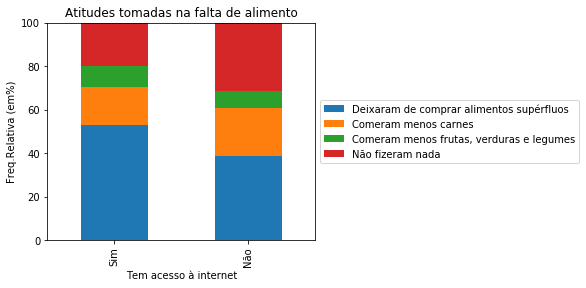

In [273]:
plot = dadoscrossIxA.iloc[0:4,:].T.plot(kind='bar', stacked=True,title='Atitudes tomadas na falta de alimento')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

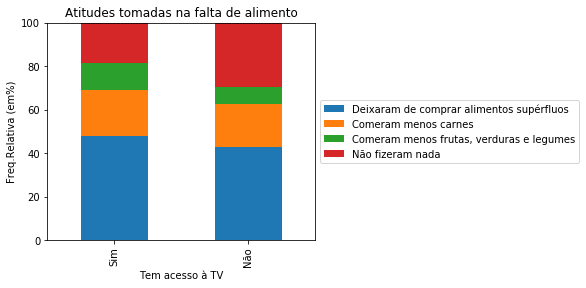

In [274]:
plot = dadoscrossTxA.iloc[0:4,:].T.plot(kind='bar', stacked=True,title='Atitudes tomadas na falta de alimento')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [275]:
sal = pd.read_csv('DOM2013.csv',sep=',')
sal = sal[((sal.V4621<999999999999) & (sal.V4621>0))]
sal.loc[:,["V4621"]]
sal.V4621.describe()

count    108864.000000
mean       1131.618248
std        1811.608302
min           1.000000
25%         375.000000
50%         678.000000
75%        1200.000000
max       82000.000000
Name: V4621, dtype: float64

___
## Conclusão 

Descreva aqui suas conclusões!

In [276]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida?

Object `comida` not found.


In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [277]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

SyntaxError: invalid syntax (<ipython-input-277-94e4dd4bfbff>, line 1)

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida

In [ ]:
O acesso à informações através da mídia (internet ou TV) influência na maneira das pessoas lidarem com a falta de comida